Task # 5
Data:
https://drive.google.com/drive/folders/1nzVk4GOvKR6P87uPszUkKMPtaXV_wrZf?usp=sharing
Fill all the necessary gaps in CNN_and_Transfer_Learning.ipynb and fit neural networks for solving the binary classification task.
Part 1:
1. Build and fit CNN with 3 convolutional layers for binary classification
2. Evaluate accuracy on test data
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)
Part 2
1. Build and fit Transfer Learning model using pre-trained VGG16-model weights from keras application.
2. Do the same with one more avaliable pre-trained deep learning model from keras application, for example Xception - https://keras.io/api/applications/.
2. Evaluate accuracy on test data for p.1 and p.2
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)
4. Check the performance of your model with the custom image of cat or dog (so the model will tell which class this image belongs to). Develop the function for the inference of the best algorithm.


In [56]:
from keras import models
from keras import layers
from keras.applications import VGG16
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.xception import Xception
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

In [27]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#!apt install unzip

In [ ]:
#!unzip '/content/drive/MyDrive/MLT LABS/Lab5/Cats_and_Dogs-20231111T091721Z-001.zip' -d '/content/drive/MyDrive/MLT LABS/Lab5/'

In [43]:
train = '/content/drive/MyDrive/MLT LABS/Lab5/Cats_and_Dogs/train'
val =   '/content/drive/MyDrive/MLT LABS/Lab5/Cats_and_Dogs/val'
test =  '/content/drive/MyDrive/MLT LABS/Lab5/Cats_and_Dogs/test'

# The shape of the RGB image
img_width, img_height, channels = 150, 150, 3 # you can try different sizes

# input shape
input_shape = (img_width, img_height, channels)
# position matters!
# Number_of_channels can be at the first or the last position
# in our case - "channels last"
# minibatch size
batch_size = 512

In [44]:
#Prepare the data
datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
    train,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

val_generator = datagen.flow_from_directory(
    val,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = datagen.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [45]:
# train set size
nb_train_samples = 20000
# validation set size
nb_validation_samples = 2490
# test set size
nb_test_samples = 2500

In [46]:
#1
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, channels)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [47]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=15,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

<ipython-input-47-1ccce81e5b41>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/15
39/39 [==============================] - 77s 2s/step - loss: 0.6907 - accuracy: 0.5565 - val_loss: 0.6289 - val_accuracy: 0.6680
Epoch 2/15
39/39 [==============================] - 68s 2s/step - loss: 0.6112 - accuracy: 0.6643 - val_loss: 0.5657 - val_accuracy: 0.7144
Epoch 3/15
39/39 [==============================] - 69s 2s/step - loss: 0.5657 - accuracy: 0.7064 - val_loss: 0.5217 - val_accuracy: 0.7476
Epoch 4/15
39/39 [==============================] - 67s 2s/step - loss: 0.5502 - accuracy: 0.7178 - val_loss: 0.5018 - val_accuracy: 0.7700
Epoch 5/15
39/39 [==============================] - 70s 2s/step - loss: 0.5171 - accuracy: 0.7461 - val_loss: 0.4897 - val_accuracy: 0.7656
Epoch 6/15
39/39 [==============================] - 67s 2s/step - loss: 0.4870 - accuracy: 0.7673 - val_loss: 0.4684 - val_accuracy: 0.7871
Epoch 7/15
39/39 [==============================] - 69s 2s/step - loss: 0.4729 - accuracy: 0.7808 - val_loss: 0.4891 - val_accuracy: 0.7686
Epoch 8/15
39/39 [==

In [48]:
#2
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

<ipython-input-48-06986b5235c6>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data: 81.79%


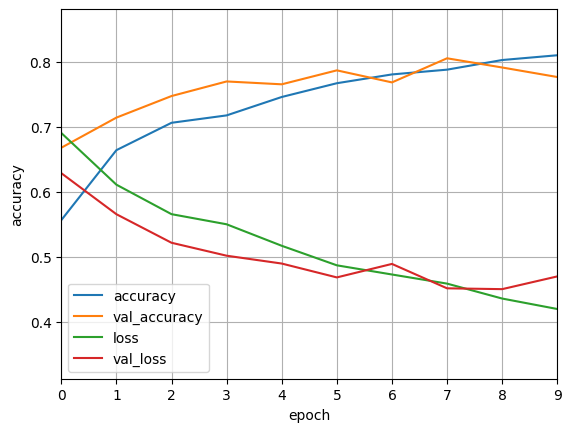

In [49]:
#3
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlim(0,9)
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss', 'val_loss'], loc='best')
plt.show()

In [52]:
#4
# First, download the weights of the VGG16 network trained on the ImageNet dataset:

vgg16_net = VGG16(weights='imagenet',
                  include_top=False,      # we take only the "convolution" part, the last layers we add ourselves
                  input_shape=(img_height, img_width, channels))
vgg16_net.trainable = False               # clearly prescribe that we do NOT overload the network.
                                          # Weights VGG16 in the process of learning will remain unchanged!

vgg16_net.summary()                       # pay attention to the number of trained and untrained parameters

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [53]:
# add layers to VGG16:

model2 = models.Sequential()
model2.add(vgg16_net)

model2.add(layers.Flatten())
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.summary()

model2.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5),
              metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 8192)              0         
                                                                 
 dense_8 (Dense)             (None, 256)               2097408   
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 2097665 (8.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [55]:
history2 = model2.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=15,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

<ipython-input-55-140561d5bc0c>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2 = model2.fit_generator(


Epoch 1/15
39/39 [==============================] - 82s 2s/step - loss: 0.4615 - accuracy: 0.8107 - val_loss: 0.2635 - val_accuracy: 0.8921
Epoch 2/15
39/39 [==============================] - 85s 2s/step - loss: 0.2478 - accuracy: 0.8939 - val_loss: 0.2315 - val_accuracy: 0.9126
Epoch 3/15
39/39 [==============================] - 76s 2s/step - loss: 0.2173 - accuracy: 0.9081 - val_loss: 0.2182 - val_accuracy: 0.9150
Epoch 4/15
39/39 [==============================] - 76s 2s/step - loss: 0.2011 - accuracy: 0.9171 - val_loss: 0.2213 - val_accuracy: 0.9160
Epoch 5/15
39/39 [==============================] - 87s 2s/step - loss: 0.1821 - accuracy: 0.9260 - val_loss: 0.2158 - val_accuracy: 0.9146
Epoch 6/15
39/39 [==============================] - 80s 2s/step - loss: 0.1717 - accuracy: 0.9301 - val_loss: 0.2070 - val_accuracy: 0.9170
Epoch 7/15
39/39 [==============================] - 73s 2s/step - loss: 0.1675 - accuracy: 0.9319 - val_loss: 0.2188 - val_accuracy: 0.9141
Epoch 8/15
39/39 [==

In [57]:
#5
xception_net = Xception(weights='imagenet', include_top=False, input_shape=(img_height, img_width, channels))
xception_net.trainable = False
xception_net.summary()

83683744/83683744 [==============================] - 0s 0us/step
Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 74, 74, 32)           864       ['input_3[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 74, 74, 32)           128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activat

In [58]:
model3 = models.Sequential()
model3.add(xception_net)

model3.add(layers.Flatten())
model3.add(layers.Dense(256, activation='relu'))
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.summary()

model3.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5),
              metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 flatten_5 (Flatten)         (None, 51200)             0         
                                                                 
 dense_10 (Dense)            (None, 256)               13107456  
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                                 
Total params: 33969193 (129.58 MB)
Trainable params: 13107713 (50.00 MB)
Non-trainable params: 20861480 (79.58 MB)
_________________________________________________________________


In [59]:
history3 = model3.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=15,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

<ipython-input-59-bbdc2fa0d8a0>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history3 = model3.fit_generator(


Epoch 1/15
39/39 [==============================] - 90s 2s/step - loss: 0.7725 - accuracy: 0.9315 - val_loss: 0.1060 - val_accuracy: 0.9639
Epoch 2/15
39/39 [==============================] - 73s 2s/step - loss: 0.0886 - accuracy: 0.9665 - val_loss: 0.0940 - val_accuracy: 0.9639
Epoch 3/15
39/39 [==============================] - 75s 2s/step - loss: 0.0802 - accuracy: 0.9690 - val_loss: 0.0967 - val_accuracy: 0.9648
Epoch 4/15
39/39 [==============================] - 75s 2s/step - loss: 0.0694 - accuracy: 0.9729 - val_loss: 0.0953 - val_accuracy: 0.9595
Epoch 5/15
39/39 [==============================] - 73s 2s/step - loss: 0.0626 - accuracy: 0.9760 - val_loss: 0.0874 - val_accuracy: 0.9634
Epoch 6/15
39/39 [==============================] - 76s 2s/step - loss: 0.0561 - accuracy: 0.9787 - val_loss: 0.0974 - val_accuracy: 0.9629
Epoch 7/15
39/39 [==============================] - 74s 2s/step - loss: 0.0522 - accuracy: 0.9802 - val_loss: 0.0886 - val_accuracy: 0.9629
Epoch 8/15
39/39 [==

In [60]:
#6
scores2 = model2.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores2[1]*100))

<ipython-input-60-a58663de4119>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores2 = model2.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data: 90.53%


In [61]:
scores3 = model3.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores3[1]*100))

<ipython-input-61-aabed6158edf>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores3 = model3.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data: 95.56%


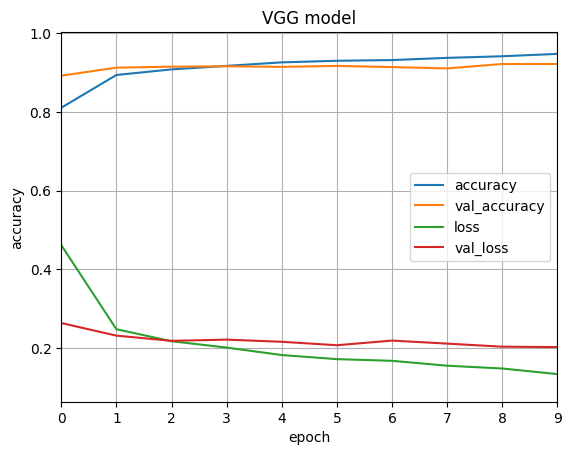

In [62]:
#7
#vgg_16
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.xlim(0,9)
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss', 'val_loss'], loc='best')
plt.title('VGG model')
plt.show()

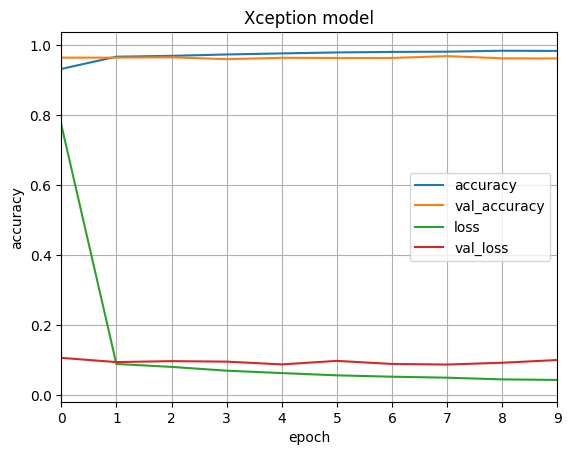

In [63]:
# xception
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.xlim(0,9)
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss', 'val_loss'], loc='best')
plt.title('Xception model')
plt.show()

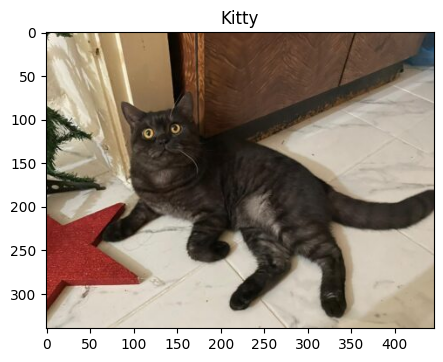

1/1 [==============================] - 0s 32ms/step
VGG16 result
Predicted probability: 0.0
Predicted class: cat


In [66]:
#8
path = '/content/drive/MyDrive/MLT LABS/Lab5/kitty.jpeg'
img_cat = mpimg.imread(path)
plt.figure(figsize = (5,5))
plt.title('Kitty')
plt.imshow(img_cat)
plt.show()


from tensorflow.keras.applications.vgg16 import preprocess_input

img_path = '/content/drive/MyDrive/MLT LABS/Lab5/kitty.jpeg'
img = image.load_img(img_path, target_size=(150, 150))

y = image.img_to_array(img)
y = np.expand_dims(y, axis=0)
y = preprocess_input(y)

predictions = model2.predict(y)

print('VGG16 result')
print("Predicted probability:", predictions[0][0])
predicted_class = 'dog' if predictions[0][0] > 0.5 else 'cat'
print("Predicted class:", predicted_class)

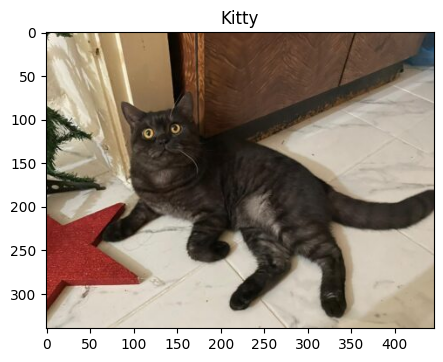

1/1 [==============================] - 0s 21ms/step
Xception result
Predicted probability: 4.2888536e-13
Predicted class: cat


In [67]:
path = '/content/drive/MyDrive/MLT LABS/Lab5/kitty.jpeg'
img_cat = mpimg.imread(path)
plt.figure(figsize = (5,5))
plt.title('Kitty')
plt.imshow(img_cat)
plt.show()


from tensorflow.keras.applications.xception import preprocess_input, decode_predictions

img_path = '/content/drive/MyDrive/MLT LABS/Lab5/kitty.jpeg'
img = image.load_img(img_path, target_size=(150, 150))

y = image.img_to_array(img)
y = np.expand_dims(y, axis=0)
y = preprocess_input(y)

predictions = model3.predict(y)


print('Xception result')
print("Predicted probability:", predictions[0][0])
predicted_class = 'dog' if predictions[0][0] > 0.5 else 'cat'
print("Predicted class:", predicted_class)

**Conclusion:**

In this laboratory work, I conducted a comparison of three models: a 3-layer convolutional neural network, and the pre-trained models VGG16 and Xception. According to the comparison results, the Xception model exhibited the highest accuracy in predictions, achieving 96% on the test data, while the convolutional neural network demonstrated the lowest accuracy at 82%. The VGG model also displayed strong classification accuracy at 91%.

Both pre-trained models were able to accurately classify a custom image of an animal with a high level of confidence.